In [1]:
import networkx as nx
import scipy.sparse
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import math
import pandas as pd

In [2]:
pip install stellargraph

In [3]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, HinSAGE, link_classification
from stellargraph import StellarGraph

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf

**Human Genome**

In [5]:
dna_sequence = "CTACTCGGGAGGCTGAGGCAGGAGAATCACTTGAACCAGGGAGTCAGAGGTTGCAGTGAGCCAAGATCGCACCACTGCACTCCAGCCTGGCAACACAGCGAGAGTCTGTCTCCAAAAAAAAAAAAAAAGGCCCAAGAGTTTCAAACTGTTTGTTGAGAGGTAATCTTATACATTCAGTTTCTTTTGGCTTACCTGAAGAGGTGCTTGGCTATGGTTAACAAACTACGTAAGCTGGTGAAAAAACCTGTCACCTTATCCAGAGAAGCTTCTTCTTTTAGAAAATCAAGCAAAACAACTAAGCCAAGACATGTTAAAAAAAAAGTTTGAAAAGAAAGCTGTAAGGAAATACAAGGGGAGGGATTGTTAGATATGAGTTCTAAATTTCTTTTCAAAAAATCGATATGTCAGTATGTTCAATTCTTTGCCTTCTACTTTTAAACTTCCTCATAAAGCAACCTTTTTCAATTACCTGCTCCACCCTGACTCATTCTGATCACCAAAGGGGCTGATAGAAAAATAAAGAGATTTGGCCAGGTACGGTGGCTCACTCCTGTAATCCCAGCACTTTGGGAGGCCGAGGCTGGCGGATCACCTGAGGTCGGGAGTTCGAGACCAGCCTGACCAACATGGAGAACCCCTGTCTCTACTAAAATTACAAAATTAGCCAGGCATGGTGGCACATGTCTGTAATCCCAGCTACTTGGGAGGCTGAGGCAGGAGGATCATTTGAACCAGGGAGGCAGAGGTTAAGTGGATATTCAGACCTCCTTGAGGCCTTCGTTGGAAACGGGATTTCTTCATATTCTGCTAGACAGAAGAATTCTCAGTAACTTCCTTGTGTTGTGTGTATTCAACTCAAAGAGTTCAACGATCCTTTATACAGAGCAGACTTGAAACACTCTTTTTGTGGAATTTGCAAATGGAGATCTCAGCCGCTTTGTGGTCAGTAGTAGAAAAGGAAATATCTTCGTATAAAAACTAGACAGAATGATTCTCAGATACCATGACAAAGATATTATTAGCCAATTTTTAGAGAGAAGGAAAGTAGTTAACCAAAGAAGTTAAGGCATATATCCTGGGTCACACAGCTATCAGACAGGCAGAGCCAAGGTGCACACCTGGATCTTTTTGACTCCAGAGCTGAGCTATCATCTACTACACTGTGCTCTGAGAGACAGACCATATTACAATTCCTGCAAGATCAAAACGCATGGCAGAAGAGATGCTAATGAGATTGCGCTGATCAGTACATGATTGGAAATTAGGCAGCATATCAGAATATCAAAATGAAAATTAGAAAATATTTGACCTGAATATTAATCTCCATCTGCCTGTCTATTAGAAGGATATTTTTCACTGGATTCAGGGCCCACCAGGATAATCCAGGATGATCTCCTTCCCTCAAGATCCTTGACTTAATCACATCTGCAAAGGCCCTTTTTCCAAATAAGTTAACATTTGTAGGTTCTGAGAATTGGGATCAGGCACATTTTTGAGGATCTGCACCAGTGCCCCCCACCACCACCTGCTATTCCAGGCCCCCATCCTAACACCTCCATTGCTCACACCAACAGAATTCCATTAGCAATGTGGAGAATCAGTTGAGTTTAATTATTCAAATCCAGGCATCAGGGGCTTTTAAATGAACCCATTCTTTCTTCCAGAATTCTAAAGTCACCAATATTTTAAAAATAAAAGGTCTCAGATCTCCTGGTCTCTCTTGTCAGTGGACACACTGGCATCAGCCCTGTGGGGGAGTAGGAACCGAGTCCCAAGGCCACAACCTCGCTGGGTGTCCCTGGGCAAGTCTCCTCCCCACTTTGAGCCTTAGTTTTCTGTCTGCAAAATGGGTTAAGTGTTTTCCTGGCCTCCCTCCAGGAGCTGCTGTGTGCGGGTGAAATGCAAAGACCCCTGTGAAAGCGTTGCCCACTGTGCGGCGTGCGGCACCCAGCGCGGAACCGTCCTAATGGGACGCTGAGACCCAGAGGGCGCCCAGGGTGGAAAATCCAAGAGTATGGCCTTGGCCCCTGGTGAGGGCCTTCTTGCTGTGTCATAACATGGCAGAGGGCATCTCATGTCAAGAGGGCAAGAGCAAGAGAGCCAGAGAGATAGCAAACCTGCTTCCATGGTAGCAACATTAATCCAGCCGTCATAAATTCGTTAATCCATTCATGGGGGCAGAGGGATTAGGTTTCCAACACAACTTTTGGAGGACACCTTCAAACCATAACAATGGCAGAGTCCTTGATATTAGAATATGCAGGGTTTGCAAAGCTGTAAACAAACTGGCATGTACTGTTTAGCATAAATAACTCATGTACTATTTAGAGTAAATTATTACATTTACAGAGGAAAAATTAAAATATTTATCAAAATTTTAAGGTATATATCCTTTGACCTAGAAATTCTAGTGGTAGGAATAAATCCTACACAGATAACTATACAAGTTCACTAATATAAATGTGTATAAGGATACATATACACACATGCACACACACAAACTGTTATAGTTCAATAGTGGTTAATATTTTGGGTAATATTTTGAGTAATTTTCTGCATTTCTTATATTGCTATCGTTTCATTTTATTTCCAGCAAAATGTATTGCATTAGAATGTGGGAGAATTCAACTGAGTTGCTGATTGGATTTTCAAACTCATCGCAGAAATCACACCTTTGAAAGCCAAAGCTTTCATTTGTAAAACCTAGGCTTTTTAAGAGAATAAAAGTATTCTTGAAAATCAAAAGGAAGGTACCAGTTGTGCAACAAATGAAATGTTTGTCCATAATTAGAGTAATTGTAACTTGATTTTAAACAGAGGTTTGATTGCATGGTGAGTGTCATAATGCCAAATGATTTTTCCATTGATTCAGGGCCCAGTGTATTCTTAAGTTGATGTTTGATCTCAGCATGTTTAACCTGGCCCAGAATATATCTGGCACCCTTTTGTGTGTGTGTTGTAAATGACTGTTCTTCTGTGTTACAGCTTCATACAAAATTTATTGCTTAGATTGGGGCTTCAAGTGTTGCCTTCAGGATACTGGATATTTATGATGAGTGAGCTAAAGCTTGTTTAGTGTCTATTTTGGGGCTATGGTAGGCAGATCTCTTCCCACTGGTTAGTGTTATTACAGCTGTTGTGATGATCTCATTGAATGTAGCTAAAATGGACTTTTAGTCAGCAACACTTTTAGAAGATTTAGTGTAATGAGTGAGCTTTTCGGGCTTTTGTTTTGTTTCGTTTTTTTGAATCTAGACAGAAGCCTTCTCAGAAACTTCACTGTGATGATTGCTTTCAACTCACAGAGTTGAATATTCCTTTTGATAGAGCAGTTTTGAAAGTCTCTTTTTCTAGCATCTGCAAATGGATAGGTGGAACTCTGTGAAGATTTCTTTGGAAACGGGAATATCTTCACGTAAAAAGTAAACAGAAGCATTCTGAGAAACTCCTTTGTGAGGCTTGTGTTCATCTCCCAGAGTATAACATTGCTTTTCATAGTAGACAGACTTGTTGAGTTAGATTTCACTGGGTACCATTTGCTTATAATTTTTAATCACTATTTTCCAAAGTATCTTTCTGAAATAAGCAAAGTAGTCTGCCAAGTTCCTAGCTCAAGTTAGGAGAGCAGAATATAGGTTAAAAAAATAAATTAAGTTGTGTTTATTTTGTAGTATCTAATTATATTGTATTAGCACAAGTTAGGAATACAGGAAAAGTGCTTACCTTAGAGATGATAAGACAATATATGATAACACTCCAATTTGAATTCACAACAAGTTAACTTCAATAGCAATACAAACAATCTGCTTCTATTCAGCTCCATCTCTACTTCCTTTTAAAGACTGATATTGTAAAATTATATACTTATATACTGTGTATCCAAAAACAGAAACTGATGATGTTTTATGTATTAATCTCTTAAATAATGTAGAAAACAAAATGTTGATTCACAAATGAAAGTTATAGTAATACTAGGTTTTAAACTAATGATAGTTTTTACAAGAACTCATCATTTTTTAAGGCTGCAGAGTATTCCATGGTGTATATGTGCCACATTTTCTTTTGTGTGTGTGTTTTTTTTTTTGTTTTGTTTAAGTTTTTCTTTTATTATTATACTTTAAGTTTTAGGGTACATGTGCACATTGTGCAGATTAGTTACATACGTATACATGTGCCATGCTGGTGCGCTGCACCCACTAACTCGTCATCTAGCATTAGGTATATCTCCCAATGCTATCCCTCCCCCCACACCTGCTGCAGCTTCATTTGCTTTCACACAAACCAGTACGTCGCTTTCACCTGTGACACTAGAACTTCTCCATTACTCTGGGAAATTGAATGTGTGTTGTAAAACTAGGAAAAATCCTGAGGTATATGGCAATGGAACTTCATCCATAGGCAGTGGAAGGATGGTTCTAGATTCAGCTCTAGTCTTTAGGTGCCCTGTGGCAGTGTGCAGAGGCTGTGGGTTTCTGGCCAGAGCGTGGAAGTCAGAAAGCCAAGGCAGGTAGATCACTTGAGGTCAGGAGTTCGAAACCAGCTTGGCCAACATACTGAAACCCCGTCCTTACTAAAAGTACAAAAATTAGCCAATGTGGTGATGCATGCCTGTAATCCCACCTACTCGGGACACTGAGGCAGGAGAATCGCTTGAACCAGGGTGGCGGATGTTGCAATGAGCCGAGATCATGCCACTGCACTCCAGCCTGGGTGACACAGCAAGACTCTGTCTCAAAAAAAAAAAAAAAGACCAGGAGTATAAATAAGCCCCTGCCTTCTTGACTGAAATTTTTACTGAGATAATTATAGAATAGATCTGCATACAGTTAGAAGAAATAATACATAGAGATCCCATATGCACTTTATTTATTTATTTATTTATTTATTTATTTATTTATTTAATGGGTTTTTTTTTTTTTTTTTTTTTTTTTTTTGAGACAGAGTCTCACTCTGTCACCCAGGCTGGAGTGCAGTGGCGGGATCTCGGCTCACTGCAGCAAATAACATATTCACCTGACAGTCAGGGCTTGGACATCTTTGAGGAACAATTTTTCAGCCTATTACATTTGGCAATCTGTGTAAAAATCACACAAGAATCTATTTATGTGAAGATTTTGGATTTTAAATTAAGCAGGAAGGGAGAAATTGTATGAATTGGCCATGGGAGTGAGCTAACAGAGAAGACTGTATTTGTCAGGTTCTCCACAGAAACAGAAACAATAGGATGGAGACAGAAGAATATGGGAGAGATATTGGTCCATAAATGTCTTTGCTTGGAATGTCTTTGCCTGGATGATGCTGACTTTATACAATGAGTTGGGAAATATTCCTTCCTCTTGCATTTTCTGGACAAGATTGTGTGAAGTGACTATTATTTCTTCCTTAAATATTTGATAGAATGCCTCATATTTCTCCCTTTTATATCCAAGTCTCACCTGGGTAGGGTTGCCAGATAAAATAAAGAATTTTCAGTTAAAATTGAATTTTAGATAAACAACTAGGACTGAGTCTTCAATGTCAAGGCAAAAAGTGACTGTTTCCCTAGAAACAAATTCTGTGGGCAGACAAAGAGGAGCCATGGACTAGCTCCTCAATCACATCGCTGTCTAATGAACAAAAGAGAAGAGACTACTCATACATATAAAGCAAGTATGTGGGGGGAAGTAAAGGAGCACAGATCCGTTTGTCTATGTATCTTTCTATCATCTATCCACCTGTCTATTAGATTGTGTTAGTTTCCTATGAGTAAGGGTCCATATTAGAAAATGTACTCTAGACAATATAAATCACTATCATAAAGAATTCATGAGAATGATAACATGGCACCAGAACTGTGACAAAACACCAACAAAACAAAACAACAACAACAACAACAAAAAAAACCTACTTATCCCCAAATTTTTCTGATTTATGATAGTTATTATGAGTTTCATTTTTTAAAAATTCCCCTTCTGCTATGGCATGAATATTTGTGTCTCCCCAAAATTCATATTTTGAAGATGGTGAATGGGAGTGCAGAAGCTGCAGCTGAAGGTGCAGCAGGTGGGGAGGATCAAGGCCTGAGAGCCCTGCTGGTTTTCTCAGCAGGGAGGCTGGTAGCCTGGGGCAAGATCTCCATCTTGCTCCCAGCTGTCCGAATATACATTCAGTGCTGTTGGTAGGAAATAGAAGGAGTGAGACTGGCTTTGCTGGCTACATGGGAGCTGGGTGAGGCCTGTCACTGCCAGCTTTCCCCCACTTCCATGGTGGACATCTGAGTTTGTGTTGGGCAGCAAACATTTGTATCCTACTGAAGTTTTAAGAGAAATGTTTTTTCCTATAAATGTATATATTTCTTATTAAAAATTGTGGTTATAAATATTTCTCTCACAAAATATAATTTCTGGGTGACAAAATAAGATATTTTTCTAAATAGGAAAGATTACTTCATCATTTAAGAGTTGTAAAATTGTATAAATAATTCATAGTCTAACTAAACTAAGGACTTTTTAAAAACTACAGTATTAAAAAGTTCAGTCTTGTCTAACTCAAAGCATTAATCTAATACTTGATTTGGAACGTCCCCTCCTGTCAGCTCAGGAATGACTCAGTGTGAGGGGAAGAGAAGCTGTGAGAAGACATAGGGGAGGACTCTGTTCTGGTTTTTTATACTCCTTTCTTCTCTCCCTATCCCACCCTCAACCTTGCCCTTTCCATTTCTGAATCCTGGGAGATGGCAGGGATCAAAAAAGGAGCTAATTTATAACTCGCTCAGTAAGGTTAAGTAACTTCTCAACAACTCAGAGCTCAGCAAGCTACAAATCCAAGTTTCTATATTAAATCTACCAGGTTCCAAAACATATGTTCTTAACCCCTACATTCTAGTGGCTGGTGGTTAAGCTCTTCTATTAACTTGAAGTCAATTCACTCTGCCTCGGTTTCCTTATCTGTCAAATAGGGGAAATCGTTCACTCTCACCATCTTTAAGTTATTGTGAAGACATGCGGTATTGAGCTTAAAGCAAAGAACAGTGTCAAAAATCTAAACGTTTTTCCTTCAACATCTGCATTTGCTTATTAAAAAACAAACCCATCCCACACCCCCAATCTCTCAAACAAGTTAAGTTTGCATGAAATGTTTTTCATTTGTCCTGATATTCAATCTGAAATTTTTTGTGTATCTGAGAGTTTTAGTCTCTTTCATTTCTACATGTCCTTACATATAGGACTTAAGATAGGAGTGGTCTTACAGAATTTTGAGAAAAACGCTAGCTGGGAACACTGCAGTGGGCTTCAAAGCACCAGGACTCATTCCCAGCCCCTGGTGGCTCCTGGGGAAGGGTGAGTTAAACAGGTGAGGAGTGGCCCACTCTTGTCACGGACCTCTGGAATCTTAGCTGCAGAAGACCTCATGACCCCCACAGACATTTAAATTGGCAGAGAGAACTGCCTGGAGAAATGGCAGGGACAGGACTCCACCCTGTGTGGAGCCCAAAGGGTTTGGCACAGGAATGGCTACAGTTTAATACCCAGGAACCTGACTACCTTGAGGTGGTCTTGGGGTCAGGCCTGCAGCTCCAGCCTTGGGGGTGTTCTGCCTGGGCAGCCATCAGGGGAGACTACTTGAGGAGAAGGAGGCGGTGCCTTGGGGTTAAGAAGATGGTGCTCCTCCCTCAGGCTAATGGGAAGGGGAGTTCTTAAATGTCCTGGAGTATCCAGGTCTGGAGAGAAGAGGACATGACCTGAAGCTCAGCAGGTGGTGGTGAGTTTAGAAAACTATAACACAAATTTAGGCACAGCATATACATCTCAGGGAGCTAAGACAGAAAATGAAGGAACTGCAATTCTTCTTGTCTTTCCACTCATGTCACTAAGAGGCACTTATTTACAGTGGAGAAGAGATATAAATGCTCACTTCTAGCAAGTGTGATTTTCAGAGTGATGCCCACAACTGAAACAGAAAGATCCCCGGGCCGGAAGTGGTGGCTGATGCCTGTAATCCCAGCACTTTGGGAGGCTGGTCTCACTCTGTCACCCAAGCTGGAGTGCAGAGGCCTGATCATGACTCACTGCAGTCTCAGCCTCCCTGGGCTCAAGTGATCCTCCCACCTCAGCCTCCCAAGTAGCTGGGACTACAGGAACATGCCACCACACTAGGCTAATTCGCGTATTTTTCTGTAGGGATGGTGACTCCCCCTTTGTTTCCAAGGCCTATTGCAAACTCTTGGCCTCAAGCCATCCTCCTGCCTCAGCCTCCCAAAGTGTTGCGATATGCTAAATATGATGAGATGTTTAAGAAGAAAAAGTGCTGGGGAGGGAGGGACATGTTTCTACCGATAAAAGAAGTTACTTAATTTCTCATCCCTTGGGTTTATTACCAGAGTTCTGAGTTTCGTCTCATAATGTAGCAAAATATTCCATGCAAGAAACCACTAGAATGCACCAGCAAAAGGAAGATGCCGAAATAATGAATGAAAAAGCATTTCCATCATGGTCGTCTCAGACAATGAGATTCCTCCAACAAAATGTAACAGGCAGAAAGTCTGTTTCAAACAAATTAAAAAGCTATGTGTTTTTTAAATTCTTCCCAAATCAGATATATACACACCCACAAAAATAGTGTGTGAAGGAAAGCTGTCATACACAAGAAGTTGTATCCTGAATTCTTCAAGGAAACACATATTGAAATAGGAATTAAGAGTCAGCAACAGATTAATAATTTTTTAAAATTGAGTCTTAAAATGCTACATGGCCCAAAGCTATACTATATGTCAGAGTTCAAGTCTGTTAGAAGAGTCCACTTCCTGAGTTTTTCCCAGCTGTGCTGTCTGAGCTCTGAAAGCACTGTGTCCCAGCCGCGACCAACTTTAGTGGACCCAAGTCCCAACCCAAAACCCTCTCACCTCCGTTCCTCGGTCAATGGCTACTTTGCCCAGCCGCACGGCAATGGGGGCCTAGGGAAAAGCAAAAAGTCTTGGTTGAGGAGGGCATCAAGGCTGATAGTTGCAGGTCTGAGGTGCTATCATGACCTTTTCAAGTGTTTTCTTGATATGAAACAAAGCTGCCACTGCCTGAGTAGTTTGTATAAAAACATCAGATTTCTAGGTGAAGCAGAAAAGAAAGGGAGTGTGGAGCTTGATTCCTTCCCCAGGGGTCTCTATGATGCCATCCTTGAATGAATGATCAAGGCGTGTCCCCCACTGCCTCTGAAGGTACTTCTCGTGGCTGCCACCAGCTGCCTTAACAATTTGGAAGGAAAGGCAGGCCCAAAAGTCATGATTATTATATCCTTATTCTATACTAATTAGCTCATTTCCTAATAGCAGTAGGTGCCAGTGTATCAAAGATATAAGATTGTTCTGAAAACTGCTTAGATGTAACGGAGACTCAGGACACTTTTCTAAATTTTCATTTATTCAAATATTATTTATCTATAGAACTATGGTTTTTAAAAATAACATTTTTAGATCTGTACTATATAACCCTGGTAGAACCAGTATCACACCAAATGTGTTTGATATACTATGGTTTTTTCTATACATACATATCTAGGATAAAGTTTAATTTATGAATTAATCATAGTAAAAGATTCATAACAGTAATGGATAATAAAACAGGAAAATTTTAACAACATGCGAGTATCACTACTTTTGCTCTTTGGGACCATTAAGTAAAATAAGGGTGACTTGAACACAAGGTCTGCAATACCACAACAGTTGATCTAATATCCCATATGGCTACTAGGTGACTAGCAGGCTGGTAGTGGACAGATTTTGCTTAGTTTCTATGTCTTTATCAGTAATTTCTCCCTAAACTCTAACCATAAGTGTAAATCTTCCACAATACATTTAAGCATTTTGGCTATATTATAAATTTTATCTTGGGCTAAGCGCAGTAGCTCACACCTGTAAGCGAAGCACTTTGGGAGGCCGAGGAGGGCAGATCACTTGAGGCCAGGAGTTCGAGACCAGCTGGCCAACATGGTAAAACCCCATCTCTACTAAAAATACAAAAATTAGGAAGCGATTATCCCACCTCAGCCTCGCCAGTAGCTGGGATTACAGGCGCCTGCCACCACGCCCGGCTAATTTTTGTATTTTTAGTAGAGACAGGGTTTTTGCCATGTTGGCCAGCCTGGTCTCAAACTCCTGACCTCAGGTGATCTGCCTGCCTCGGCCTCCCGAAGTGCTGGGATTAGAGACATGAGCCTCTGTGCCTGGCCTAGAAAAAGAGTTTTTATGCCACTCAGAGATATTGAGGGTCTGAGAAGGACTCACAGTTTTCCTCCTGGCTCACAGTGTAGGCTGCAGCCTACTGATTCTTTCAAAGGCTCTGTGATTTCAGTTTTTCTGTGATGTTCTTGTGTTGCTTCTTGAATAAAAGTTCACAGCATGAGTCTCTAAACGGTATTTTGTCTTTCCAAGTGGAAGAGGCATGTTAGCAATGCTTCCAATCCACCATCTTGGAAAAATATTCTTCCCTGTTTTCCTTTATAGTTTTTATCACTTATATATATATATTACCCCCTGCATGACCATTCACCCCTGGACCCCACCCTCCAGCAGCGCCCCCACCACTAGTGAATGCCTTCTTGCCACTCAGTTTGCTCCCAACACCCCTTTCCAGCCACTCACTGAAGCTACCTTGGCAAGTACTCTAGGAGTATGGGAAAATGAAAACAACAAACTCACACACCTGTTTAACATGCATAACTAGTTCTGTCTACCCAGCCAAGGTATATTCTTCTTATGTGGAACATCGACCTATATCCTTGCCTTTCTCTATCTTCCCGTGGCTCTTGGCAATCCTTGGTGATCCCTTGGCTTATGCATGCACCACTCCAATCTCTACCTCCATCTTCATATTATTCTCTTCTCTGGCTCTGTGTATCTTTTCTTCTTCTTATAAGGACACCAGTCATTGGACTTAGGGTTTATCTGAGTCTTAACTGATTATATCTTCAAAGACCCCATTGCCAAATAATGTTGCATTCTAAGGTTCTGGCTGGATGTGAATTTTAGCTCTTGCAAGAAGCTTGGAGGGTAGGTTGGGCACGAGTGGCTCATGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTGGGTGGATCACCTGACGTCAGGAGTTCAAGACCAGCCTGGCCAACATGGTGAAACCTGTCTCTACTAAAAATACAAAAATTAGCTAGGTGTGGTAGCACGTGCCTGTAATCACAGCTGCACAGGAGGCTGAGGCAGGAAAATCACTTGAACCCCAGAGATGGAGGCTGTAGAGGAGTATAAGCCAGCCACAGACCCAGGGGGCACATCTTACACTGTCTTTGGGAGAAAGAAAAAGTACTAATAACAAATAAATCTGATGGGATTTCAGATGGATTCCAGTCTCATTCTTTTGTGATAGCAGGGAGTGAGGTTTTGATATATTCCCTCTAGAGATGGTTCTAAACATGGAGACCCATCGATATCCAGGTATACCTCCTCTCCTCTCTGATCAATCCAATTGCTAAACAAGACCAGAGCAAGGCAGGACTGTAACCACTACACGGTGCTCCATGGCTTCTACTACTTAACTTGTGGGACTTTGCTGCCTCAGTTTCATCATCAGAAAAATATAAATAATAATAACACCAGGTGTACAGGGATGCTCTATTAAACATTAAAATTGTGTGGGAAGTGCTTTGTAAGTTGTAAATAACTATAAAAATACTAGTGATTTTTTAGAGATTTCTCATAGGACAATATCAGACACAGGAAAAAACAAAAATAAACAACACTGGACTATTTCTCTCCCAACAATGCATTATTCAGCTAATAGAGTTTTCTTAGGGAATTATATTCAACTAATAAAAACAGTATTTTCAAATGGTCCAGAAATGGCATCATGTCCCCAACAGCTGGTACTAATGTTTCAAACTCACAACCACCTCTGAGGACAAATACGAATCTATCCCTTTTACCAATGAAGACATTGAGGGTAAAGGGGTTAAGCGACTCACCTCAACTTGTGGTTCAATTTAGTGGTGTCAAGAAGGGTTGGGGAAATTCCTGGGTGGGTGACTGCAATTGAGCAGGGGCTGACGGCTGGGGCTTATTCTCAAATCTTCAGGGTCAGAGACACTTAGAGCAACCAACACATCCTCTGTCTACCATGTCTGGGCATCCCCCATCAGGGAGAGAACACGATATCCATTCAGTCCTGGCGATGTACTTTCGGAGTACACCCCTGGAGGATGTCCAGGCAGAGGTTTGAGCCAAGGTCCCTTAAAGAGAAGTTCCAGTGTGATCATGCCCTCAACCCCTGCCCACCCACATCCAGGCAGCAGCTATGGGCTGCAGGTGCCCTGGATGGATTCCACACCTGAGGAGAAGCAGCTGTGGCAAGCCCTCCTGGAGCAGCCGTGCGAATGGGTGGATGGCCTTCTACCCCTCAGAACCAACCTGGCCCCCAGGACGTAGCCCCACCAAGCCTCTCTCTCTGGACCCCCATCTCAGGGCCTGCCCTTGGCTAAAGTCAATAAAGTCTGTGTTCACTTACAAACATATCCTGTTGTTTCTTCCCTGCAAGATATCCAGCACACAGGCTGAATTTTTCTTTATAATAATCCTTGGCAAAAGCATAACTTTTCAAAAACCAAATGATTTTAGTGGTGCTATGGCAGCTGCAGTTTTGAGTTAGATTAATGTGGTGAAAACCATCAAATACTTAGAAATTGACTGGGTGCGGTGGCTCATGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGTAGGTGGATTGGAATTGCAAAGTGAGGGCAGAGTCTATTTATATTGGGTTTAATTAACTCCTCTCCCTGGTGCCACTAAAGCAGCAATCACACTGCAGACAGCACTGATTTGATTGGCAAGAGATGCACCAGGCAGAATATTAAGGGACCAGGCCCCTATAAATAGGCCTAATCACAGCCCCTCACTGGAAAATGGTAAGGAAGACATTAATCAGGCCTGGCACTGTGCCCTAGACCTGCTCCCCTAGGCACTACAGTGGGCTGGTCTCAAACTCATGAGCTCAAGCAATCCACCTGCCTTGGCCTCCCAAAGTGCTGAGATTACAGGCATGAGCCACCGTGCCTGGCCCAGAACTACACTTTTGTATTGCACCTGATAAAATTCAGAGGTCCCTTAAACTGTTACACCTGTTACTCCTTTATAGCAAATATAAGCTTTTATAAATCTATTGCTTCATTTATTTGGGCATATGTTTGTGTGTCCTCTACTTACCAGAAACTCCATGAGGCTTAACATTAAAAACCAGTTATAGGCTGGGTGTGGTGGTTCACGCCTGTAATCCCAACACTTTGGGAGGCCAAGGCAATAGGACTGCTTGAACTCAGGAACTTGAGGCCTCAGTAAGCTAAGAAAATATCACTGCATTTCAGCCTTGGCAACAGGGCAAGACCCCATCTCTTAAAAAAAAAAAAAAAAAGTATAAATTAGCGACACAAGATTTTATTTAAAAATGTATAGCACATTAGGCCAGGCATGGTGCAGTGGCGGGATCTCGGCTCACTGCAAGCTCCGCCTCCCGGGTTCACGCCATTCTCCTGCCTCAGCCTCCCGAGTAGCTGGGACTACAGGCGCCCGCCACTACGCCCGGCTAATTTTTTGTATTTTTAGTAGAGACGGGGTTTCACCGTTTTAGCCGGGATGGTCTCGATCTCCTGACCTCGTGATCCGCCCGCCTCGGCCTCCCAAAGTGCTGGGATTACAGGCGTGAGCCACCGCGCCCGGCCAGGGACTCAGAAGAGGATAGTGTTGTGCCCTTTCACACATTACAATCTAATTAACAAACAACACAGAGGCAGGAACACTGCAGAAGGTCTTGCCAAATGAGGGAGACAGACATACATTTATGTTACAGAGTTCAGAACAGTCTTACTATATCCAATGTCCCACCAACCCATTTTCTTCCTTCCTTTTTTTTCTTCCTTCCTTTTTTTTCTTCCTACCCAAAGCCCAGCCATAACTTTGCAGCTCTTGGTCAAGTTCTGGTTTTCCTAGGCAGAGGACCCTGCGGCCTTCCGCAGTGTTTGTGTCCCTGGGTACTTGAGATTAGGGAGTGGTGATGACTCTTAACGAGCATGCTGCCTTCAAGCATCTGTTTAACAAAGCACATCTTGCACCGCCCTTAATCCATTTAACCCTGAGTGGACACAGCACATGTTTCAGAGAGCACAGGGTTGGGAGTAAGGTCACAGATCAACAGGATCCCAAGGCAGAAGAAGTTTTCTTAGTACAGGCACGTGCCACCACACCCAGCTAATTTTTGTATTTTTTAGTAGAGACGGGGTTTCGCCGTGTTGGCCAGGCTGGTCTTGAACTTCTGACCTCAGGTGATCCGCCCACCTCGGCCTCCCAGAGTGCTGGGATTACAGGCATGAGCCACTGCGCCTGGCCACATTTATTCTTTTACATGTCTGGAGGTCACAAGTCTGCAATAACTTTCACTGGGCTAAAATCAAGGTATCAGTGGGGCTGTACTTCCTCGGTCAGGAGATCGAGACCATCCTGGTCTAACTTGGTGAAACCCCGTCTCTACTAAAAATACAAAAAATTAGCCGGGCGTGGTGGCAGGCGCCTGTGGTCCCAGCTACTTGGGAGGCTGAGGCAGAAGAATAGCGTGAACCCGGAAGGCGGAGCTTGCAGTGAGCCCAGATTGCGCCACTGCACTCCAGCCTGGGTGACAGGGCAAGACTCTGTCTCAAAAAAAAAAAAAAGAAAAAAAAAAAAAGCCGGGCAAACTATTGCAGGGACAAAAATTCAAACACCACCTGTTCTCACTCATAGGTGGGAATTGAACAGTGAGAACACTTGGACACAGGAAGGGGAACATCACACACTGGGGCCTATTGTGGGGTGGGGGGATGGGGGAGGGATAGCATTAGGAGATATACCTAATGTAAATGACGAGTTAATGGGTGCAGCACACCAACTTGGCACATGTATACATATGTAACAAACTTGCACGTTGTGCACATGTACCCTAGAAAATAGATTTTTCTAGTTTTATGAAGAATGACATTAATAATTTGATAGGAATAGCACTGAATCTGTAAATTGCTTTGGGCAGTGTAGCCATTTTAATGATATTAATTCTTCCTATTTATGAGCATGGGATGTTTTTCCATTTGTTTGTGTCTTCTCTGATTTCTCTGAGCAGTGTTTTGTAATTCTCTTTGTAGAGATCTTTCACCTTCCTGGGTAGTTATAGTCTAGATTACTAGATATTTTATTCATTTTCTGGATATCTTGATTTTTTAAATAATAACTCTGCATACGTCCAAAGTCAAAATTAAGAGTAGAAATGAAACATCAGGTTAACTCAAACTCAAAGGTAATTGAGATTTAAATGGTATGTTTACTAAAAACATAGATAAGTGAAGCAACATGGGAATTTCTATCGATATTATTCAGATAAATGTCTATTTTCTTCTCCTCGTTTAGCCAGCCACGTGCCTTCAATGCAAGTTTAGCTTGCTGAGTTTTGAGAGGCAGGGGTTTGTGGCACGGTAGCGTGGGGAGGTGACAAGAAAGGGAGCTTGGTGTAAGCTGATGATGTGGGGGCCTCAAACACCCAGCCTAGCAGGGCAGACTTGATGCTTTATGCTGGTGTCATTGGAAAAACCTAGTGTTTTCCCAGATGTTCACAGATGTTCCATGAGGGATGGGGGCTGGATCCCATTCTCCATCCTTCCTTGTCTCATTCTGTTCCCTGGAAGTCTGGCCTCTACCATGTGTTGATGAAAGGAACATTAATGTCACACTGCAAAGAAGTGTGCACACAGACATGAGAGCATTTATGCCTCTTCCCCCTGTTTTTGGAATCAGTATTAGTGGTTATGCTAAAAGTTCTTGCCATTCTTTTGCATCGGTGTTTACACAATATAATACTTTGTTAAGATGCAGAGAATCTAATTTCTATTTTACTGCAGGTAACTCACTCCTACGGTTACATACTATAGAGACAATGCTTTTCTGATTCAAATGGAGTGTTGTAAGAATTAACTAAGATTGTGTATTCTTTGTTGTAAATGGTGTAGTAGATTGCATATTCTTTGTAGACCATTTGCATGTAGACAGAGACTATGGTGCTGGGTGGCTAGGAAGAAAGCTTCCCTGAAGTTTGTTCATGTGCTGGCCATCAGCCATTGTCTTCTAAAAATGGGTACCAGTAGGATGTGGTCTTTGAAACAGCCCTGTTAGAGACAAGATGGTGGTCACAGACTCGGGAGTGCTGCTACAGGTGCGCACCACCACGCCTGGCTAATTTTTGTATTTTTAGTAGAGACGCGGTTTCACCATGTTGGCCAGGATGATCTCGATCTCTTGACCTCGTGATCTGCCTGCCTCGGCCTCTCAGAGTGCTGGGATTACAGGCGTGAGCCACCGCGCCCAGCTCACTCTGAATATTTTGAGCGACCTATTTATGATTTGAATTTATTCATTCGAGAAGCACCCCAACATACCTCCTATATGTCAGGCATGGAAAACTGGAAGCATTCCCTTTGAAAACGAGCACAAGACAAGGATGCCCTCTCTCACTACTCCTATTCAGAATAGTGTTGGAAGTTCTGGCCAGGGCAATCAGGCAAGAGAAAGAAATAAAGCATATTCAAATAGGAAGAGAGGAAGTCAAATTGTCTCTGTTTGCAGATGACATGATTTAGAATACCCCATCATCTCAGCCCCAAAACTCCTTAAGCTGATAACCAACTTCAACAAGGTCTCAGGATACAAGCTTCAAGCCCCATGGTCACAAAGTCCTATTTGGGACTCAGGATCTTAGAGGGCAATGGTCCTGAAATGTGAACCCCAAATCCATCTCCCACTGCATAAAACCTCTGACTTGGGTGAATCTGGGCTCCTGGAGAAGCCTGAGGGAGAATGAGCTCCCCATTTCCATGGCTTTCTGTAGCCCAGAGAAGACGCAGAGGCAGAGCCTGGGTAAAGCTGGGAAGGTCAAGGAGATGAGACCCTCCTGTGGGACTGTTGATTCACTCGTACTATCAATATGAACATGATTGTTGCTTTCTAAAGATACCTGAAAAGTAAAGGCAAAGAGATCACAATGTATAGAAAAATAGATGTATCCCCAGGGTCATAGCCTGCTGGAAACTGATGTGTTCCTTTTGAAGAGATTAAGTATAAATTTTCCTTAGTCAGAGGTCTGGAAGAAAAATTGGGGAATAAATAGCACCTTTTCTGATTAAGAATAGGATACCTAACACAAAAAGAGTCCGACACCTGCGAAGCGCGGCACCTGGGGAGGGCGAACCGGGGGCCGCCCGGCCTTCCCGAGCACACCCCCTCGGTACCCGACGCTGCCCCGCGGCCGGAACCTCGTACCTGCGAGGCCCGCGAGCTACAGGCGCGCGCGACGCCTCCTCATCTCAGTGGCTCCTGCTCTCCCTCCGCCTCCTGCTGCCGCCGCCGTCGCCGCTGCCGCCGCTGGAGGCCGGGACACGACTAGCTCAGGACTCCACCGCCGGTAGATATTTCTAACTCTGAGTGGCTATACTCAAAGAATGATGATTAATGGAAGAAAATGAACTTGTGGAGGACTTCTATCCTTATCCTACTCAACATTTTTATTAATTAAGGATGCACAAAGTATGCTTATCAATTTTGCAGACACAAAGCTGGGATGTCAGCTGATATGCTAGGTGACAGAATTAGCATTCAAAAAGAAATGAGCAAGCTAGAAAGACGACTTGCAATGAGTAAGATATTTAATAAGGTTAACTTGTAATACATAGTTGACTGTATCATTCAACCCTTCCTTAAAATTAAAAGATCACTTATAAGTTTTAAATAAGTCCCCCAAACAAATATAAAATCAAATTCTTATCTAAAAACTGAATGAATTCTGTCCTCAAAAAACACATGAGAATATTAGTCATTTTAATGAATTCAATATCTTGAAAATTGTCACCACAACTTCCTTGATATTCAGAGATGTCTTCTTTATCATGAAGGGGATCTGTTTCTCAAAACAAAATATGTATAGCCTCAATTATTTGAAATTTGTTAAACTTGTTTTATATCCTGGTGTATGACCAATGCTGAAAATGTTCTGTAGTTGCAGGATGCAATGTTCTATAGATAGCAATTAGTTCAAGTTTGTGAGTCATATGTTGCAAATCTGTGATTTCAATGATGTTTTATGTTTTTCTGATCAAGTATTGAGAGAGTTGTGTTAAAATCTCCTTTTATAATTGTGTTTGTGCTTGTGATTTCAGCCTTGTTCTCTGCTGGGATCAGAACTGCAACCCCACATCATGCCTTGGAAGAGGCATGTGAGCCCTGAACATCATTTACTGGAAAGCAGGAAGAGGGGTGGAGCCTACTGTCCTGCATCCCATGATGGATCCTTGAAGTTCCAAGTTTTCCTTGCATGACAAGGACACTTCCCAGCATTTCTGGTCCTCATTGCTGCCCATCTATATCATGGGGGCTGGAACCGGGCATTTGGAGCTCTCGATTTGTAACTAATAGAGATTATTCTCATAAATTAACTGTGCTTATGGCATTTTGGTCGTACAGAAACTAATCATCACATAAAAAACAATATTCCCAAGGAAAATGCATCAAACTTCTTACTAAGATACAAGAAAT"
print(len(dna_sequence))

18626


In [6]:
dna_list = []
for i in range(0,len(dna_sequence)-len(dna_sequence)%4,2):
    dna_list.append(dna_sequence[i:i+4])
    
Links = []
for i in range(len(dna_list)-1):
    Links.append((dna_list[dna_list.index(dna_list[i])],dna_list[dna_list.index(dna_list[i+1])]))

In [7]:
network = nx.Graph(Links)

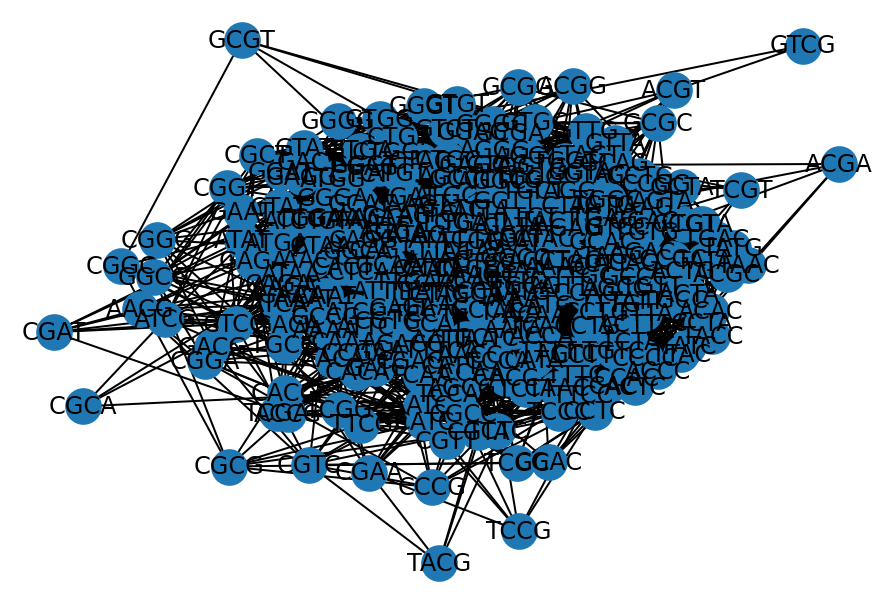

In [8]:
nx.draw(network,with_labels=True)

In [9]:
nodes = network.nodes
nodes

NodeView(('CTAC', 'ACTC', 'TCGG', 'GGGA', 'GAGG', 'GGCT', 'CTGA', 'GGCA', 'CAGG', 'GGAG', 'AGAA', 'AATC', 'TCAC', 'ACTT', 'TTGA', 'GAAC', 'ACCA', 'GAGT', 'GTCA', 'CAGA', 'GGTT', 'TTGC', 'GCAG', 'AGTG', 'TGAG', 'AGCC', 'CCAA', 'AAGA', 'GATC', 'TCGC', 'GCAC', 'CACT', 'CTGC', 'TCCA', 'CAGC', 'GCCT', 'CTGG', 'CAAC', 'ACAC', 'ACAG', 'AGCG', 'CGAG', 'AGAG', 'AGTC', 'TCTG', 'TGTC', 'TCTC', 'CAAA', 'AAAA', 'AAGG', 'GGCC', 'CCCA', 'CAAG', 'AGTT', 'TTTC', 'TCAA', 'AAAC', 'ACTG', 'TGTT', 'TTTG', 'GAGA', 'GGTA', 'TAAT', 'ATCT', 'CTTA', 'TATA', 'TACA', 'CATT', 'TTCA', 'CAGT', 'GTTT', 'TTCT', 'CTTT', 'TGGC', 'GCTT', 'TTAC', 'ACCT', 'GAAG', 'AGGT', 'GTGC', 'TTGG', 'CTAT', 'ATGG', 'TTAA', 'AACA', 'AACT', 'ACGT', 'GTAA', 'AAGC', 'GCTG', 'TGGT', 'GTGA', 'GAAA', 'CTGT', 'CACC', 'CCTT', 'TTAT', 'ATCC', 'CCAG', 'CTTC', 'TCTT', 'TTTT', 'TTAG', 'GCAA', 'ACTA', 'TAAG', 'GACA', 'CATG', 'AAAG', 'TGAA', 'TGTA', 'AGGA', 'AATA', 'AGGG', 'GATT', 'TTGT', 'GTTA', 'TAGA', 'GATA', 'TATG', 'CTAA', 'AAAT', 'ATTT', 'TCGA'

In [10]:
def transform (ch):
  L=[ord(c) for c in ch]
  return L

In [11]:
trans = [transform(ch) for ch in nodes]
Input_AutoEncoder = np.asarray(trans)
print("the shape of our input: ",Input_AutoEncoder.shape)
print(Input_AutoEncoder)

the shape of our input:  (256, 4)
[[67 84 65 67]
 [65 67 84 67]
 [84 67 71 71]
 ...
 [67 71 65 67]
 [65 67 71 65]
 [67 71 67 67]]


In [12]:
Input_AutoEncoder_norm = Input_AutoEncoder/np.max(Input_AutoEncoder)
Input_AutoEncoder_norm

array([[0.79761905, 1.        , 0.77380952, 0.79761905],
       [0.77380952, 0.79761905, 1.        , 0.79761905],
       [1.        , 0.79761905, 0.8452381 , 0.8452381 ],
       ...,
       [0.79761905, 0.8452381 , 0.77380952, 0.79761905],
       [0.77380952, 0.79761905, 0.8452381 , 0.77380952],
       [0.79761905, 0.8452381 , 0.79761905, 0.79761905]])

**Auto Encoder**

In [13]:
input_size = 4
hidden_size = 10
code_size = 3

input_array = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_array)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_array = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_array, output_array)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(Input_AutoEncoder_norm, Input_AutoEncoder_norm, epochs=3)

Epoch 1/3
8/8 [==============================] - 0s 2ms/step - loss: 0.6887
Epoch 2/3
8/8 [==============================] - 0s 2ms/step - loss: 0.6754
Epoch 3/3
8/8 [==============================] - 0s 2ms/step - loss: 0.6596


In [14]:
weight1=autoencoder.get_weights()
print (weight1[0].shape)
print (weight1[1].shape)
print (weight1[2].shape)
print (weight1[3].shape)
print (weight1[4].shape)
print (weight1[5].shape)
print (weight1[6].shape)
print (weight1[7].shape)

(4, 10)
(10,)
(10, 3)
(3,)
(3, 10)
(10,)
(10, 4)
(4,)


In [15]:
def ReLu (x):
  return max(0.0 , x)

In [16]:
import math as m
def sigmoid(x):
  return 1 / (1 + m.exp(-x))

In [17]:
def compute_features_auto_encoder (node):
  Input_AutoEncoder = [ord(c) for c in node]
  Input_AutoEncoder_norm = Input_AutoEncoder/np.max(Input_AutoEncoder)
  
  out1 = np.dot(weight1[0].T,Input_AutoEncoder_norm) + weight1[1]
  out2 = [ReLu (x) for x in out1]
  out3 = np.dot(weight1[2].T,out2) + weight1[3]
  out4 = [ReLu (x) for x in out3]
    
  return (out4)  

In [18]:
g_feature_attr = network.copy()
for node, node_data in g_feature_attr.nodes(data=True):
    node_data["feature"] = compute_features_auto_encoder(node)

In [19]:
G = StellarGraph.from_networkx(g_feature_attr, node_features="feature")
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 256, Edges: 2958

 Node types:
  default: [256]
    Features: float32 vector, length 3
    Edge types: default-default->default

 Edge types:
    default-default->default: [2958]
        Weights: all 1 (default)
        Features: none


In [20]:
edge_splitter_test = EdgeSplitter(G)

In [21]:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 295 positive and 295 negative edges. **


In [22]:
batch_size = 50
epochs = 100  # The number of training epochs for training the GraphSAGE model.

# train, test, validation split
train_size = 0.6
test_size = 0.2
val_size = 0.2

In [23]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_val = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_val, edge_ids_val, edge_labels_val = edge_splitter_val.train_test_split(
    p=val_size, method="global", keep_connected=True
)

** Sampled 532 positive and 532 negative edges. **


In [24]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_val)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=train_size, method="global", keep_connected=True
)

** Sampled 1278 positive and 1278 negative edges. **


In [25]:
print(G_train.info())
print(G_val.info())
print(G_test.info())

StellarGraph: Undirected multigraph
 Nodes: 256, Edges: 853

 Node types:
  default: [256]
    Features: float32 vector, length 3
    Edge types: default-default->default

 Edge types:
    default-default->default: [853]
        Weights: all 1 (default)
        Features: none
StellarGraph: Undirected multigraph
 Nodes: 256, Edges: 2131

 Node types:
  default: [256]
    Features: float32 vector, length 3
    Edge types: default-default->default

 Edge types:
    default-default->default: [2131]
        Weights: all 1 (default)
        Features: none
StellarGraph: Undirected multigraph
 Nodes: 256, Edges: 2663

 Node types:
  default: [256]
    Features: float32 vector, length 3
    Edge types: default-default->default

 Edge types:
    default-default->default: [2663]
        Weights: all 1 (default)
        Features: none


In [26]:
num_samples = [10, 5]

In [27]:
train_gen = GraphSAGELinkGenerator(G_train, batch_size, num_samples)
val_gen = GraphSAGELinkGenerator(G_val, batch_size, num_samples)
test_gen = GraphSAGELinkGenerator(G_test, batch_size, num_samples)

In [28]:
layer_sizes = [32, 32]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=train_gen, bias=True,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)
)

In [29]:
# Build the model and expose input and output sockets of graphsage, for node pair inputs:
x_inp, x_out = graphsage.in_out_tensors()

In [30]:
logits = link_classification(
    output_dim=1, output_act="linear", edge_embedding_method="ip"
)(x_out)

prediction = keras.layers.Activation(keras.activations.sigmoid)(logits)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


In [31]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [32]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy,
             keras.metrics.MeanSquaredError(name='my_mse'),
             keras.metrics.AUC(name='my_auc'),
             f1_m,precision_m,recall_m,
             ],
)

In [33]:
train_flow = train_gen.flow(edge_ids_train, edge_labels_train, shuffle=True)
val_flow = val_gen.flow(edge_ids_val, edge_labels_val)
test_flow = test_gen.flow(edge_ids_test, edge_labels_test)

In [34]:
init_train_metrics = model.evaluate(train_flow)
init_val_metrics = model.evaluate(val_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nValidation Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_val_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

12/12 [==============================] - 1s 51ms/step - loss: 0.8194 - binary_accuracy: 0.5000 - my_mse: 0.3028 - my_auc: 0.4339 - f1_m: 0.4956 - precision_m: 0.4917 - recall_m: 0.5000

Train Set Metrics of the initial (untrained) model:
	loss: 0.8192
	binary_accuracy: 0.5000
	my_mse: 0.3027
	my_auc: 0.4461
	f1_m: 0.6662
	precision_m: 0.5028
	recall_m: 1.0000

Validation Set Metrics of the initial (untrained) model:
	loss: 0.8194
	binary_accuracy: 0.5000
	my_mse: 0.3028
	my_auc: 0.4360
	f1_m: 0.4900
	precision_m: 0.4836
	recall_m: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 0.8194
	binary_accuracy: 0.5000
	my_mse: 0.3028
	my_auc: 0.4339
	f1_m: 0.4956
	precision_m: 0.4917
	recall_m: 0.5000


In [35]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=val_flow, verbose=0, shuffle=True,
)

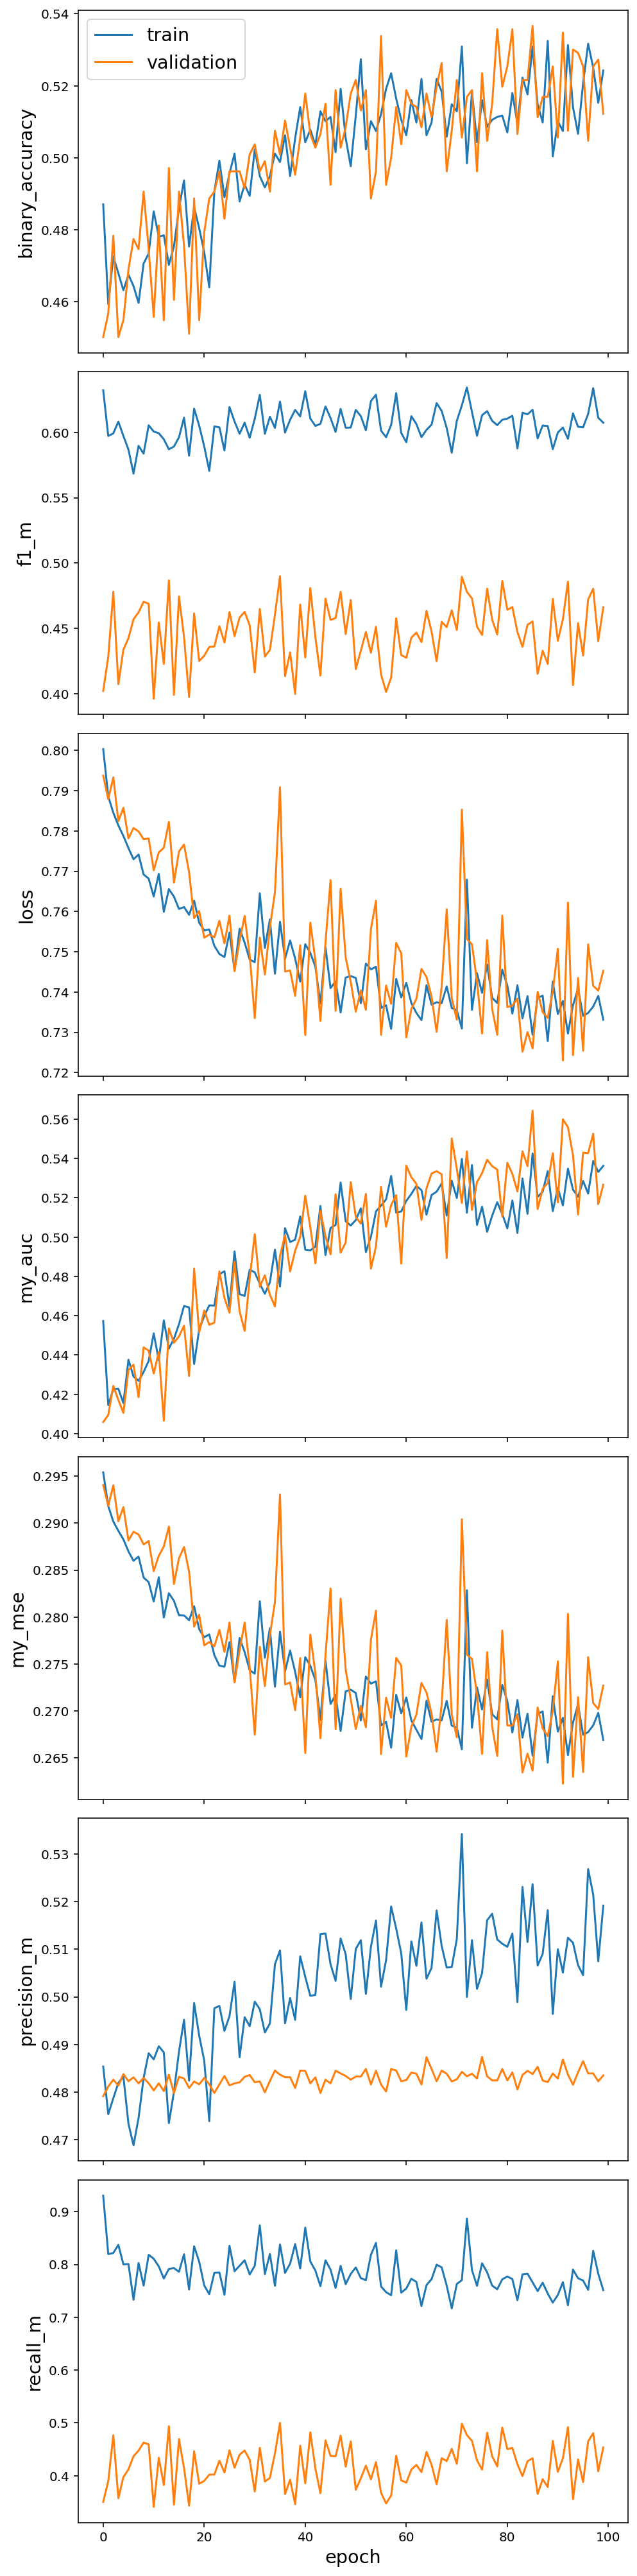

In [36]:
sg.utils.plot_history(history)

In [37]:
train_metrics = model.evaluate(train_flow)
val_metrics = model.evaluate(val_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nValidation Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, val_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

12/12 [==============================] - 1s 42ms/step - loss: 0.7284 - binary_accuracy: 0.5339 - my_mse: 0.2648 - my_auc: 0.5768 - f1_m: 0.4815 - precision_m: 0.4929 - recall_m: 0.4713

Train Set Metrics of the trained model:
	loss: 0.7410
	binary_accuracy: 0.5188
	my_mse: 0.2707
	my_auc: 0.5097
	f1_m: 0.6284
	precision_m: 0.5141
	recall_m: 0.8221

Validation Set Metrics of the trained model:
	loss: 0.7420
	binary_accuracy: 0.5197
	my_mse: 0.2710
	my_auc: 0.5144
	f1_m: 0.4692
	precision_m: 0.4845
	recall_m: 0.4576

Test Set Metrics of the trained model:
	loss: 0.7284
	binary_accuracy: 0.5339
	my_mse: 0.2648
	my_auc: 0.5768
	f1_m: 0.4815
	precision_m: 0.4929
	recall_m: 0.4713


**Generalizability: Ferroglobus placidus**

In [38]:
dna_sequence_test ="TTTGACTGATTTAAGCAAAACATTAAAGTATTTTTCACATTCATTTAAGCTGTGGTAATCACCTACAGCAGAAACGTGTTCCTACCTTTCGAGATCCTGCAGAAATCGCTGCTACTACTGCGGATTTAGGAGAGAGAACGACGGCTTAATGAGCCTCGACTCGATAATCTCTTTGCTAAGGAAAGCGAAAAACGCAACCGAAGCCTTGCTCACGTTTGGAGAACAACCAGAGTTCAGCGAGAAGGTAAAAAAAGATCTTAAGGCTTTAGGATTCAGCAGTTTTTCGGATTACGTTAAGTCCGTCTGCGAAATTGCAATTAAGGAGGGCTTTTTACCCCACACGAATCCGGGAGTCGTTGATACTGACTTTTTGAAGAAGGTTAAAGATTTCAACGCTAGCATGGGGCTTATGCTTGAGCAAGCGGTTGAACTGGAGTGTCACAAAGAGAGTCCCGGAAAGAAGCCGGAAGAAAGAATAAAATTCATAAAAAAAGCTGGAAAGCTGAAAATTCCTTTCACCACCGGAATTTTAGTGGGGATAGGTGAAAAGTTCGAAGACAGAATTTACTCCCTCGAAGTTATAGCAGATTTACACGACAACTACGGACACATTCAGGAGGTGATAATCCAGAATTTTTCACCGAAGAAGGGAACAAAAATGGAAAACTTTAAACCCCCTTCTACTTCCGAAATGCTTGAAACTGTCAAAGTAGCCAGAAAGATTATTCAGAAGGATGTAGCGATCCAAGTTCCTCCGAACTTGGTGAAGGAAGTTGAGGTGTTCGTGAAAGCCGGAGCTAACGATCTTGGAGGAATTTCTGACGTAACTCCAGACTTCATAAATCCCGAACATCCATGGCCGAAGGTTGAGGAGATATCCGAGAGGTTGAAAGGGTACGAATTAAAGGAGAGGTTGCCAATCTATCCAAAATTCGTGGTGGAAGGTTGGTACAGCGAAAAAATCGCTCCGCTTATTGAAGCTTATTCAGACGAGGAGGGTTACAAATGCTGAAAGAACTTCTCGTTAAGGAACCGTTCAAAACGTTCGAAATAGCTAACAAAATCAGAGAGGAGGAAGTAGGAGACGTGGTAACTTACGTCGTTAATAGGAACATAAACTTCACGGACATCTGCATTAACTCCTGCAAATTCTGCTCATATCGGAACAGAAGGAAGTTCGTTTTGTCAACCGACGAGATAAAGAAGAAGGTTGAAGAAGCCGTAAATTACGGCTGCACGGAAGTTTGCATTCAAGGAGGACTTTATCCTAATGCTGATGTGGAATTTTACAAATCTATTTTAAGAGCGGTGAGGGAAGTTTCGAAGGACATTCACATTCACGCATTCTCTCCAATGGAAATCGTGCACGCGGCAAGAAACTCTGGATGCGATGTTGAGGATGTTTTGAGAGAGCTTAAAAAAGCGGGATTGAATTCTATGCCGGGAACAGCTGCTGAAATTCTTGACGACGAAATAAGAAGAATAATCTGTCCGGATAAGCTTTCGGTGGAGGAATGGGTCGACGTTATTAAGACCGCCCATTACTTGGGAATTCCGACGACAGCAACCATAATGTACGGGCACATCGAAAGCTGGGAGCACAGAATAAAGCATCTTATGATCATAAGGGAAATTCAGGAGGAAACTTCCGGATTCACCGAATTCATTCCCCTCCCGTTCATGAACAAAAACAACGAGCTCGGGAAAATAGCAAGGCAATCCTCCGGTTTCGAAGACCTGTTGATGATTTCAATCGCGAGAATAATTCTCCATCCGGTTATCCCGAACATTCAGGCTTCGTGGGTTAAGCTTGGAATATTGCTCAGGCAGCTTTGAATTTCGGAGCAAACGACCTCGGAGGAACATTGATGGAAGAGAACATTTCGAGGCTTGCTGGCTCCACTTCCGGAGAGTTTCTTCCGAAAGAGGAAATGGAAAGATTAATACTGAACGCCGGCAGAATCCCGGCTGAGAGAGATACGCTTTACAGAATAATCAGAGTTAGAGAAAATGTCTGAAATATCACTTTACAGCGTTTTCGCAACGGAGCGAGCGAAGCGTTGAGCAGAGGAACATTCTTTCGAAGGTGAAACTTCCCCTAAAAGTCGTCGAAGTGGATAAAGATTTGTTCCCCGATAAGGCTGAGGAACTTGAGGAGATAGGAGCCTCCTTCGGCGTTCACGGCTTGCCATTAAACGTCCTCTTTTACAAAGATATACCAATTTACGCGAGCGGATTTTTGAGCGAGAAAGACGTTTTAAAGTTAATTGAGGTAACGAAATCGCTCTTAAAAGCGGACGAAAGAAAAGTCTTAGAGGAAGGAAGGAAAGTAATTGAGAAAGTCGAAAACAGAAAAAAGGGTAAAGAGGGTTTAGCTGGATTAGAGCTTCTTTAATAGTGGGAGCAATTCTTTTCGGGATTATGCTGATGAGGCTTGAGGAAGTTGAAAGCGATTTCAAAGTTGCTGGAATACTCTATTTCCTCGGAATGATACTGAGCTTTTTCACAGGAATTATTGGGGTGCTGATCGGAATAGCAACTACAGCTCTAATTTACATCAGCGCAAAAAGCGCTTTAAAGAGGATATCCGCTGCTTGAAGAGAAAATGTTTTATCCAATCCCGTATTACTTATATTCGACCCCAGCGGGGAGGGGTGTGGAGAGAGCTAAGCTTTCGATGAAGCTCCCTGCAAGGCTGGGGTTACACCATGCCGATAGGTCCCCTGGTGAGAGAGCCCTGGCTTTCGATGACCCTGGGGCAACCCGGGCATGGGACAAAGCCCCGAGAGGTCAGCCGTTTGAGAGAGCGCAGCTTTCGATGATATACGGCGTTACACTCGGGGCACAGGAATTAGAAAACCTTTTTGAGTAAATCTTCGAACTCCTCTCTTCTGATAACTCTTCCGTGCCCCGGATAGAGTTTCTCAAACTCAAATTTCAAAACCTTCCTCAGGCTCCTTCTGTATTCTTCGTCGTTCCAGTTGAAGTTTTTCGAGGACAACGTTGGATTGTCACTAAAGACTTTACATCTAACGAGATCTCCGCAAATAAGCGAGTCACCGACGAGAATGGAAATGCTTCCTTCAGTGTGTCCGGGAGTGTGGATTATTTCGAGATCTTTTAACTCCTCTACGCTTTCAACCTCCTCAAGATACTTTGGCTTCTTTATGCTTTCGTAAAACCTCGCAAAAGACCCTATCAAGCCCTTGTATTCGTGTTTCTTAATTCCTTTAAGATATTCGAACTCTTTCGGATGTGCGTATACCTTGCTCTTCAAAATTTTCGAAAGAGCGCGAGCTGAGCCCATGTGATCGAAGTGGGAGTGCGTGAGAATAATTCCTTCGCATTCCTTAACAGCTTCGGCAATTCTCCTTTCATTCCCCGGTAATCCGGTATCTACGACGCCATCAACTACTACGAGGTAAACGTTACAGCCTTTCGCCTTTATCAGTTCCACCATGTTACGAGATCTTTTGAATGTATTTATTAACATTGAGGGGAAATTAGGAATATGTACCGCTTTGTGGAGCATACTGCAGACATAGCTTTTGAAGTTGAAGCTGAAAGCCTCGAAGAGCTTTTTATAGATGCTGCAAACGCCTTTTACGAAGCTTTTTGTAACAGAGACCTTGTCAAAGAGGAGAAGAGAGAAGATTGGAGCTCGAGGAAGAAGACGTAGAGCATCTCCTTTACTCGTGGCTGAACGAGATTCTCTTTCTGTTGATGCCGAGCACTTCGCAGCGAAAAGAGTTGAAGTCAGCGTAGAGAACAACTCTCTAAAAGCGAGACTTATCGGGGGAAAAATAACTCCTGAAGCCTCAAACTCGAACCTAAAGCCATAACGATGCACAAATTCAGAGTTGAAAGGAAGGACGGAAAATATATTTCTTTATGGACAGTAGCACCTGGAGCCCCAAGACCACCGCGGTCACCCGGCCTGTTGAGACCCACGAGCTCATTCGCAATGCAGCCGATATCTCCATCATCGTTATCTACTTCGTGGTAGTGATGGCCGTCGGACTGTGGGCTATGTTTTCCACCAATCGTGGGACTGTTGGAGGCTTCTTCCTGGCAGGCCGAAGTATGGTGTGGTGGCCGATTGGAGCCTCCCTCTTTGCTAGTAACATTGGAAGTGGCCACTTTGTGGGGCTGGCCGGGACTGGGGCAGCTTCAGGCATCGCCATTGGAGGCTTTGAATGGAATGCCCTGGTTTTGGTGGTTGTGCTGGGCTGGCTGTTTGTCCCCATCTATATTAAGGCTGGGGTGGTGACAATGCCAGAGTACCTGAGGAAGCGGTTTGGAGGCCAGCGGATCCAGGTCTACCTTTCCCTTCTGTCCCTGCTGCTCTACATTTTCACCAAGATCTCGGCAGACATCTTCTCGGGGGCCATATTCATCAATCTGGCCTTAGGCCTGAATCTGTATTTAGCCATCTTTCTCTTATTGGCAATCACTGCCCTTTACACAATTACAGGGGGCCTGGCGGCGGTGATTTACACGGACACCTTGCAGACGGTGATCATGCTGGTGGGGTCTTTAATCCTGACTGGGTTTGCTTTTCACGAAGTGGGAGGCTATGACGCCTTCATGGAAAAGTACATGAAAGCCATTCCAACCATAGTGTCTGATGGCAACACCACCTTTCAGGAAAAATGCTACACTCCAAGGGCCGACTCCTTCCACATCTTCCGAGATCCCCTCACGGGAGACCTCCCATGGCCTGGGTTCATCTTTGGGATGTCCATCCTTACCTTGTGGTACTGGTGCACAGATCAGGTCATTGTGCAGCGCTGCCTCTCAGCCAAGAATATGTCTCACGTGAAGGGTGGCTGCATCCTGTGTGGGTATCTAAAGCTGATGCCCATGTTCATCATGGTGATGCCAGGAATGATCAGCCGCATTCTGTACACAGAAAAAATTGCCTGTGTCGTCCCTTCAGAATGTGAGAAATATTGCGGTACCAAGGTTGGCTGTACCAACATCGCCTATCCAACCTTAGTGGTGGAGCTCATGCCCAATGGACTGCGAGGCCTGATGCTATCAGTCATGCTGGCCTCCCTCATGAGCTCCCTGACCTCCATCTTCAACAGCGCCAGCACCCTCTTCACCATGGACATCTACGCCAAGGTCCGCAAGAGAGCATCTGAGAAAGAGCTCATGATTGCCGGAAGGTTGTTTATCCTGGTGCTGATTGGCATCAGCATCGCCTGGGTGCCCATTGTGCAGTCAGCACAAAGTGGGCAACTCTTCGATTACATCCAGTCCATCACCAGTTACTTGGGACCACCCATTGCGGCTGTCTTCCTGCTTGCTATTTTCTGGAAGAGAGTCAATGAGCCAGGAGCCTTTTGGGGACTGATCCTAGGACTTCTGATTGGGATTTCACGTATGATTACTGAGTTTGCTTATGGAACCGGGAGCTGCATGGAGCCCAGCAACTGTCCCACGATTATCTGTGGGGTGCACTACTTGTACTTTGCCATTATCCTCTTCGCCATTTCTTTCATCACCATCGTGGTCATCTCCCTCCTCACCAAACCCATTCCGGATGTGCATCTCTACCGTCTGTGTTGGAGCCTGCGCAACAGCAAAGAGGAGCGTATTGACCTGGATGCGGAAGAGGAGAACATCCAAGAAGGCCCTAAGGAGACCATTGAAATAGAAACACAAGTTCCTGAGAAGAAAAAAGGAATCTTCAGGAGAGCCTATGACCTATTTTGTGGGCTAGAGCAGCACGGTGCACCCAAGATGACTGAGGAAGAGGAGAAAGCCATGAAGATGAAGATGACGGACACCTCTGAGAAGCCTTTGTGGAGGACAGTGTTGAACGTCAATGGCATCATCCTGGTGACCGTGGCTGTCTTTTGCCATGCATATTTTGCCTGAATGCTGCCGCAGCAAGTCGGCTTCGTGTGCGCGGTGCTGGCCCTGGTGTGCTGTGCGTCCGGCCTCTTCGGCAGCTTGGGGCACAAAACAGCTTCTGCTAGCAAACGTGTCCTGCCAGACACATGGAGAAATAGAAAGTTGATGGCCCCAGTGAATGGGACACAGACAGCCAAGAACTGCACAGATCCTGCGATTCACGAGTTCCCCACAGATCTGTTCTCCAATAAGGAGCGACAGCACGGAGCCGTCCTGCTGCACATCCTTGGTGCTCTGTATATGTTCTATGCCTTGGCCATAGTGTGCGATGACTTCTTTGTTCCGTCTCTAGAGAAGATCTGTGAGAGACTCCATCTGAGCGAAGATGTGGCTGGAGCCACCTTCATGGCTGCAGGAAGCTCAACGCCAGAGCTGTTTGCGTCTGTTATTGGGGTGTTCATCACCCATGGGGACGTCGGGGTGGGCACCATCGTGGGCTCTGCTGTGTTCAACATCCTGTGCATAATTGGAGTGTGCGGACTGTTTGCTGGCCAGGTGGTCCGTCTGACGTGGTGGGCCGTGTGCCGAGACTCCGTGTACTACACCATCTCTGTCATCGTGCTCATCGTGTTCATATATGATGAACAAATTGTGTGGTGGGAAGGCCTGGTGCTCATCATCTTGTATGTGTTTTATATTCTGATCATGAAGTACAATGTGAAGATGCAAGCCTTTTTCACAGTCAAACAAAAGAGCATTGCAAACGGTAACCCGGTCAACAGTGAGCTGGAGGCTGGTAATGATTTCTATGACGGTAGCTATGATGACCCTTCCGTGCCATTGCTGGGGCAAGTGAAGGAGAAGCCACAGTATGGCAAGAACCCCGTGGTGATGGTGGACGAGATTATGAGCTCCAGCCCTCCCAAGTTCACCTTCCCTGAAGCAGGCTTACGAATCATGATCACCAATAAGTTTGGACCCAGGACCCGACTACGGATGGCCAGCAGGATCATCATTAATGAGCGGCAGAGACTGATCAACTCGGCCGTGAGCAGTAAGCCGCTTCAAAACGGGAGGCACGAGAACATTGAGAACGGGAATGTTCCTGTGGAAAACCCCGAAGACCCTCAGCAGAATCAGGAGCAGCAGCCGCCGCCACAGCCACCACCGCCAGAGCCAGAGCCGGTGGAGGCTGACTTCCTGTCCCCCTTCTCCGTGCCGGAGGCCAGAGGGGACAAGGTCAAGTGGGTGTTCACCTGGCCCCTCATCTTCCTCCTGTGCGTCACCATTCCCAACTGCAGCAAGCCCCGCTGGGAGAAGTTCTTCATGGTCACCTTCATCACCGCCACGCTGTGGATCGCCTCCTACATCATGGTGTGGCTGGTGACTATTATCGGATACACACTTGGGATCCCGGATGTCATCATGGGCATTACTTTCCTGGCAGCAGGGACAAGTGTTCCAGACTGCATGGCCAGCCTAATTGTGGCGAGACAAGGCCTTGGGGACATGGCAGTCTCCAACACCATAGGAAGCAACGTGTTTGACATCCTGGTAGGACTTGGTGTACCGTGGGGCCTGCAGACCATGGTTGTTAATTATGGATCAACAGTGAAGATCAACAGCCGGGGGCTGGTCTATTCCGTGGTCCTGTTGCTGGGCTCTGTCGCTCTCACCGTCCTCGGCATCCACCTAAACAAGTGGCGACTGGACCGGAAGCTGGGTGTCTACGTGCTGGTTCTCTACGCCATCTTCTTGTGCTTCTCCATAATGATAGAGTTTAACGTCTTTACCTTCGTCAACTTGCCGATGTGCCGGGAAGACGATTAGATGGGTGTCAGGCAACAGTTGGCCTTGCTGCTGCTGCTGCTGCTCCTGCTCTGGGGCCTGGGGCAGCCAGTGTGGCCAGTCGCTGTGGCCTTGACCCTGCGCTGGCTCCTGGGGGATCCCACATGTTGCGTGCTACTTGGGCTGGCCATGTTAGCACGGCCCTGGCTCGGCCCCTGGGTGCCCCATGGGCTGAGCCTGGCAGCTGCGGCCCTGGCACTAACCCTCCTGCCAGCACGGCTGCCCCCAGGACTACGCTGGCTGCCGGCTGATGTGATCTTCTTGGCCAAGATCCTCCACCTGGGCCTGAAGATCAGGGGATGCTTGAGCCGGCAGCCGCCTGACACCTTTGTAGATGCCTTCGAGCGGCGAGCACGAGCGCAGCCTGGCAGGGCACTCTTGGTGTGGACGGGGCCTGGGGCCGGCTCAGTCACCTTTGGTGAGCTGGATGCCCGGGCCTGCCAGGCGGCATGGGCCCTGAAGGCTGAGCTGGGTGACCCTGCGAGCCTGTGTGCCGGGGAGCCTACTGCCCTCCTTGTGCTGGCTTCCCAGGCCGTTCCAGCCCTGTGTATGTGGCTGGGGCTGGCCAAGCTGGGCTGCCCAACAGCCTGGATCAACCCGCATGGCCGGGGGATGCCCCTGGCGCACTCTGTGCTGAGCTCTGGGGCCCGGGTGCTGGTGGTGGACCCAGACCTCCGGGAGAGCCTGGAGGAGATCCTTCCCAAGCTGCAGGCTGAGAACATCCGCTGCTTCTACCTCAGCCATACCTCCCCTACACCAGGGGTGGGGGCTCTGGGGGCTGCATGGTGGCGAGCGCGCGAGTGCAGAAGCTGGTGCGGCGCTACAAGCTGGCGATTGCCACGGCGCTGGCCATCCTGCTGCTGCAGGGCCTGGTAGTGTGGAGCTTCAGCGGCCTGGAGGAGGACGAGGCGGGCGAGAAAGGAAGGCAGAGGAAGCCACGGCCACTGGACCCTGGCGAAGGTTCCAAGGACACAGACAGTTCAGCAGGGCGACGGGGCAGCACAGGCAGAAGGCATGGGCGCTGGCGGGGCCGTGCTGAGAGCCCAGGAGTGCCCGTGGCCAAGGTGGTACGGGCAGTAACCAGCCGGCAGAGAGCCAGCCGGCGGGTCCCACCTGCCCCACCTCCGGAAGCCCCAGGCCGCCAGAACCTGAGTGGGGCAGCAGCTGGGGAGGCGCTGGTAGGGGCAGCTGGCTTCCCACCACACGGAGATACAGGGAGCGTGGAGGGCGCCCCCCAGCCCACGGACAATGGCTTCACCCCCAAGTGCGAGATCGTGGGCAAGGACGCACTGTCTGCACTGGCCCGGGCCAGCACCAAGCAGTGCCAGCAGGAGATCGCCAATGTGGTGTGCCTGCACCAGGCTGGGAGCCTCATGCCCAAGGCTGTGCCCCGGCACTGTCAGCTGACTGGGAAGATGAGCCCCGGCATCCAGTGGGATGAGAGCCAAGCCCAGCAGCCCATGGATGGCCCCCCGGTGCGAATCGCCTACATGCTGGTGGTTCACGGCCGCGCCATCCGCCAGCTGAAGCGTCTCCTCAAGGCCGTTTATCACGAGCAGCACTTCTTTTACATCCATGTGGACAAGCGTTCCGACTACCTGCACCGGGAGGTGGTGGAGCTGGCCCAGGGCTATGATAACGTGCGGGTGACGCCCTGGCGCATGGTTACCATCTGGGGCGGGGCCAGCCTCCTGACGATGTACCTGCGGAGCATGCGGGACCTGCTAGAGGTGCCTGGCTGGGCCTGGGACTTCTTCATCAACCTCAGTGCCACTGACTATCCAACCAGGACCAATGAGGAGCTGTTCCTATCCAAGAACCGGGACAAGAATTTCCTCAAGTCACATGGCCGGGACAACTCCAGGTTCATCAAGAAACAGGGCCTGGACCGGCTCTTCCATGAGTGCGACTCACACATGTGGCGCCTGGGCGAGCGGCAGATCCCAGCAGGCATTGTGGTGGATGGCGGTTCTGACTGGTTCGTGCTGACACGCAGCTTTGTGGAGTATGTGGTGTACACAGATGACCCGCTTGTGGCCCAGCTGCGCCAGTTCTACACATACACACTGCTCCCAGCCGAGTCCTTCTTCCACACGGTGCTGGAGAACAGCCTGGCCTGTGAGACCCTCGTGGACAACAACCTGCGGGTCACCAACTGGAACCGCAAGCTGGGCTGCAAGTGCCAGTACAAGCACATTGTGGACTGGTGTGGCTGCTCCCCCAACGACTTCAAGCCACAGGACTTCCTCCGGCTGCAGCAAGTCTCCAGACCCACCTTCTTCGCCCGGAAGTTCGAGTCGACTGTGAACCAGGAGGTGCTGGAAATCCTGGACTTCCACCTGTACGGCAGCTACCCCCCCGGCACGCCAGCCCTCAAGGCCTACTGGGAGAACACCTACGACGCGGCTGATGGCCCCAGTGGGCTCAGTGATGTCATGCTCACTGCTTACACAGCCTTCGCCCGCCTCAGCCTGCACCATGCCGCCACTGCTGCACCCCCAATGGGCACCCCACTCTGCAGGTTTGAGCCCAGGGGCTTGCCGTCCAGCGTGCACCTGTATTTCTATGACGACCATTTCCAGGGCTACCTGGTGACGCAGGCGGTGCAGCCCTCAGCCCAGGGGCCGGCAGAGACGCTTGAGATGTGGCTGATGCCCCAAGGGTCGCTGAAGCTGTTGGGGCGCAGTGACCAGGCCAGCCGGCTCCAGAGTCTGGAGGTTGGCACTGATTGGGACCCCAAAGAGCGTCTTTTCCGGAACTTTGGGGGGTTACTGGGGCCGCTGGACGAGCCTGTGGCCGTGCAGCGCTGGGCCCGGGGCCCCAACCTAGCCACAGTGGTCTGGATCGACCCAACCTATGTGGTGGCCACATCTTATGACATCACAGTAGATACGGAGACTGAGGTCACGCAATACAAGCCCCCACTGAGCCGGCCCCTGCGGCCAGGGCCCTGGACTGTTCGACTCCTTCAGTTCTGGGAACCGCTGGGTGAGACCCGCTTCCTTGTGCTGCCCTTGACCTTCAACCGCAAACTACCTCTCAGGAAAGATGATGCCAGCTGGCTGCACGCAGGGCCACAACGAGTACATGGAGCAGAGTTTCCAGGGCCTGAGTAGCATCCTGAACCTGCCTCAGCCGGAGCTCGCGGAGGAGGCTGCCCAGCGGCACACACAGCTCACAGGCCCTGCGCTCGAGGCCTGGACAGACAGGGAACTGAGCAGCTTCTGGTCCGTGGCTGGACTGTGTGCCATAGGCCCCTCTCCCTGCCCCTCCCTGGAGCCCTGCAGACTGACCAGCTGGAGCTCTCTGTCCCCCGACCCCAAATCAGAGCTGGGGCCTGTCAAAGCAGACGGGCGACTCAGGTAGATGGCTTTGCCTCTGAGGCCCCTGACCCGGGGCTTGGCCAGCGCTGCCAAAGGAGGCCACGGAGGAGCAGGAGCTCGTACCTGGCGTCTGCTGACCTTCGTGCTGGCGCTGCCCAGCGTGGCCCTCTGCACCTTCAACTCCTATCTCCACTCGGGCCACCGCCCGCGCCCCGAGTTCCGTCCCTACCAACACCTCCGCATCCGCACCAAGCCCTACCCCTGGGGGGACGGCAACCACACTCTGTTCCACAATAGCCACGTGAACCCTCTGCCCACGGGCTACGAACACCCCTGAATGGCATCTACGGAAGGTGCCAACAATATGCCCAAGCAGGTGGAAGTGCGAATGCACGACAGTCATCTTGGCTCAGAGGAACCCAAGCACCGGCACCTGGGCCTGCGCCTGTGTGACAAGCTGGGGAAGAATCTGCTGCTCACCCTGACGGTGTTTGGTGTCATCCTGGGAGCAGTGTGTGGAGGGCTTCTTCGCTTGGCATCTCCCATCCACCCTGATGTGGTTATGTTAATAGCCTTCCCAGGGGATATACTCATGAGGATGCTAAAAATGCTCATTCTCCCTCTAATCATCTCCAGCTTAATCACAGGGTTGTCAGGCCTGGATGCTAAGGCTAGTGGCCGCTTGGGCACGAGAGCCATGGTGTATTACATGTCCACGACCATCATTGCTGCAGTACTGGGGGTCATTCTGGTCTTGGCTATCCATCCAGGCAATCCCAAGCTCAAGAAGCAGCTGGGGCCTGGGAAGAAGAATGATGAAGTGTCCAGCCTGGATGCCTTCCTGGACCTTATTCGAAATCTCTTCCCTGAAAACCTTGTCCAAGCCTGCTTTCAACAGATTCAAACAGTGACGAAGAAAGTCCTGGTTGCACCACCGCCGGACGAGGAGGCCAACGCAACCAGCGCTGTTGTCTCTCATGCCGCGCCCCCGCCTGCTGGCCGCGCTGTGCGGCGCGCTGCTCTGCGCCCCCAGCCTCCTCGTCGCCCTGGATATCTGTTCCAAAAACCCCTGCCACAACGGTGGTTTATGCGAGGAGATTTCCCAAGAAGTGCGAGGAGATGTCTTCCCCTCGTACACCTGCACGTGCCTTAAGGGCTACGCGGGCAACCACTGTGAGACGAAATGTGTCGAGCCACTGGGCCTGGAGAATGGGAACATTGCCAACTCACAGATCGCCGCCTCGTCTGTGCGTGTGACCTTCTTGGGTTTGCAGCATTGGGTCCCGGAGCTGGCCCGCCTGAACCGCGCAGGCATGGTCAATGCCTGGACACCCAGCAGCAATGACGATAACCCCTGGATCCAGGTGAACCTGCTGCGGAGGATGTGGGTAACAGGTGTGGTGACGCAGGGTGCCAGCCGCTTGGCCAGTCATGAGTACCTGAAGGCCTTCAAGGTGGCCTACAGCCTTAATGGACACGAATTCGATTTCATCCATGATGTTAATAAAAAACACAAGGAGTTTGTGGGTAACTGGAACAAAAACGCGGTGCATGTCAACCTGTTTGAGACCCCTGTGGAGGCTCAGTACGTGAGATTGTACCCCACGAGCTGCCACACGGCCTGCACTCTGCGCTTTGAGCTACTGGGCTGTGAGCTGAACGGATGCGCCAATCCCCTGGGCCTGAAGAATAACAGCATCCCTGACAAGCAGATCACGGCCTCCAGCAGCTACAAGACCTGGGGCTTGCATCTCTTCAGCTGGAACCCCTCCTATGCACGGCTGGACAAGCAGGGCAACTTCAACGCCTGGGTTGCGGGGAGCTACGGTAACGATCAGTGGCTGCAGGTGGACCTGGGCTCCTCGAAGGAGGTGACAGGCATCATCACCCAGGGGGCCCGTAACTTTGGCTCTGTCCAGTTTGTGGCATCCTACAAGGTTGCCTACAGTAATGACAGTGCGAACTGGACTGAGTACCAGGACCCCAGGACTGGCAGCAGTAAGATCTTCCCTGGCAACTGGGACAACCACTCCCACAAGAAGAACTTGTTTGAGACGCCCATCCTGGCTCGCTATGTGCGCATCCTGCCTGTAGCCTGGCACAACCGCATCGCCCTGCGCCTGGAGCTGCTGGGCTGTTAG"
print (len(dna_sequence_test))

13174


In [39]:
dna_list_test = []
for i in range(0,len(dna_sequence_test)-len(dna_sequence_test)%4,2):
    dna_list_test.append(dna_sequence_test[i:i+4])
    
Links_test = []
for i in range(len(dna_list_test)-1):
    Links_test.append((dna_list_test[dna_list_test.index(dna_list_test[i])],dna_list_test[dna_list_test.index(dna_list_test[i+1])]))

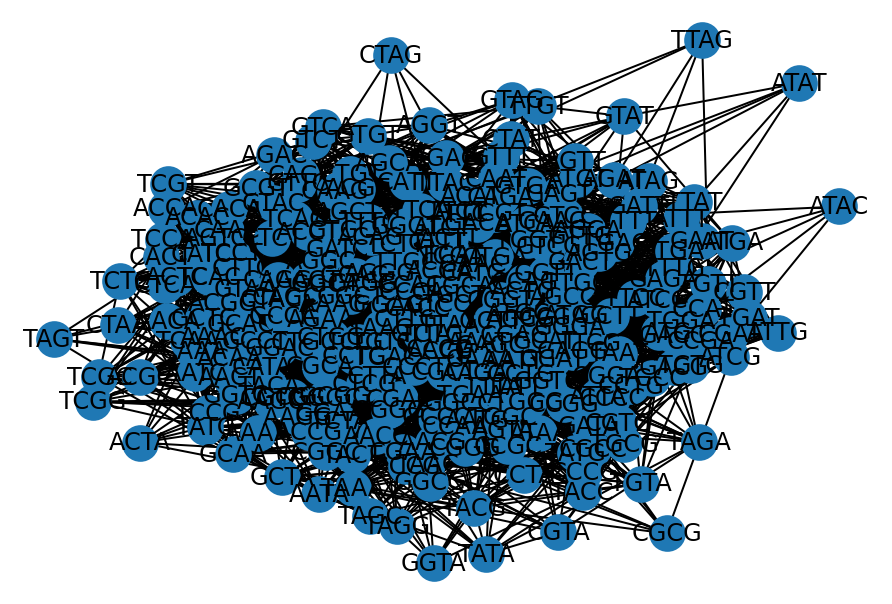

In [40]:
network_test = nx.Graph(Links_test)
nx.draw(network_test,with_labels=True)

In [41]:
nodes_test = network_test.nodes
nodes_test

NodeView(('TTTG', 'TGAC', 'ACTG', 'TGAT', 'ATTT', 'TTAA', 'AAGC', 'GCAA', 'AAAA', 'AACA', 'CATT', 'AAAG', 'AGTA', 'TATT', 'TTTT', 'TTTC', 'TCAC', 'ACAT', 'ATTC', 'TCAT', 'GCTG', 'TGTG', 'TGGT', 'GTAA', 'AATC', 'ACCT', 'CTAC', 'ACAG', 'AGCA', 'CAGA', 'GAAA', 'AACG', 'CGTG', 'TGTT', 'TTCC', 'CCTA', 'TACC', 'CCTT', 'TCGA', 'GAGA', 'GATC', 'TCCT', 'CTGC', 'GCAG', 'AGAA', 'AAAT', 'ATCG', 'CGCT', 'GCTA', 'TACT', 'TGCG', 'CGGA', 'GATT', 'TTTA', 'TAGG', 'GGAG', 'AGAG', 'CGAC', 'ACGG', 'GGCT', 'CTTA', 'TAAT', 'ATGA', 'GAGC', 'GCCT', 'CTCG', 'ACTC', 'GATA', 'ATCT', 'CTCT', 'CTTT', 'TTGC', 'TAAG', 'AGGA', 'GCGA', 'CGCA', 'CAAC', 'ACCG', 'CGAA', 'CTTG', 'TGCT', 'CTCA', 'CACG', 'CGTT', 'TGGA', 'GAAC', 'ACAA', 'AACC', 'CCAG', 'AGTT', 'TTCA', 'CAGC', 'GAAG', 'AGGT', 'AGAT', 'AGGC', 'GCTT', 'GGAT', 'TCAG', 'CAGT', 'GTTT', 'TTCG', 'TTAC', 'ACGT', 'GTTA', 'AGTC', 'TCCG', 'CGTC', 'TCTG', 'ATTG', 'TGCA', 'CAAT', 'ATTA', 'GAGG', 'GGGC', 'CCCC', 'CCAC', 'ACAC', 'ACGA', 'GAAT', 'ATCC', 'CCGG', 'GGGA', 'GAGT'

In [42]:
trans_test = [transform(ch) for ch in nodes_test]
Input_AutoEncoder_test = np.asarray(trans_test)
print("the shape of our input: ",Input_AutoEncoder_test.shape)
print(Input_AutoEncoder_test)

the shape of our input:  (256, 4)
[[84 84 84 71]
 [84 71 65 67]
 [65 67 84 71]
 ...
 [71 71 67 67]
 [71 71 67 71]
 [67 84 65 71]]


In [43]:
Input_AutoEncoder_norm_test = Input_AutoEncoder_test/np.max(Input_AutoEncoder_test)
Input_AutoEncoder_norm_test

array([[1.        , 1.        , 1.        , 0.8452381 ],
       [1.        , 0.8452381 , 0.77380952, 0.79761905],
       [0.77380952, 0.79761905, 1.        , 0.8452381 ],
       ...,
       [0.8452381 , 0.8452381 , 0.79761905, 0.79761905],
       [0.8452381 , 0.8452381 , 0.79761905, 0.8452381 ],
       [0.79761905, 1.        , 0.77380952, 0.8452381 ]])

In [44]:
input_size = 4
hidden_size = 10
code_size = 3

input_array = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_array)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_array = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder_test = Model(input_array, output_array)
autoencoder_test.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_test.fit(Input_AutoEncoder_norm_test, Input_AutoEncoder_norm_test, epochs=3)

Epoch 1/3
8/8 [==============================] - 0s 2ms/step - loss: 0.6915
Epoch 2/3
8/8 [==============================] - 0s 2ms/step - loss: 0.6887
Epoch 3/3
8/8 [==============================] - 0s 2ms/step - loss: 0.6851


In [45]:
weight_test=autoencoder_test.get_weights()

In [46]:
def compute_features_test_auto_encoder (node):
  Input_AutoEncoder = [ord(c) for c in node]
  Input_AutoEncoder_norm = Input_AutoEncoder/np.max(Input_AutoEncoder)
  
  out1 = np.dot(weight_test[0].T,Input_AutoEncoder_norm) + weight_test[1]
  out2 = [ReLu (x) for x in out1]
  out3 = np.dot(weight_test[2].T,out2) + weight_test[3]
  out4 = [ReLu (x) for x in out3]
    
  return (out4)  

In [47]:
g_feature_attr_test = network_test.copy()
for node, node_data in g_feature_attr_test.nodes(data=True):
    node_data["feature"] = compute_features_test_auto_encoder(node)

In [48]:
Gr_test = StellarGraph.from_networkx(g_feature_attr_test, node_features="feature")
print(Gr_test.info())

StellarGraph: Undirected multigraph
 Nodes: 256, Edges: 2835

 Node types:
  default: [256]
    Features: float32 vector, length 3
    Edge types: default-default->default

 Edge types:
    default-default->default: [2835]
        Weights: all 1 (default)
        Features: none


In [49]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train_test = EdgeSplitter(Gr_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train_test, edge_ids_train_test, edge_labels_train_test = edge_splitter_train_test.train_test_split(
    p=train_size, method="global", keep_connected=True
)

** Sampled 1701 positive and 1701 negative edges. **


In [50]:
train_gen_test = GraphSAGELinkGenerator(G_train_test, batch_size, num_samples)

In [51]:
train_flow_test = train_gen_test.flow(edge_ids_train_test, edge_labels_train_test, shuffle=True)

In [52]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the fourth GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [53]:
train_metrics_test = model.evaluate(train_flow_test)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics_test):
    print("\t{}: {:0.4f}".format(name, val))

69/69 [==============================] - 3s 46ms/step - loss: 0.8156 - binary_accuracy: 0.5000 - my_mse: 0.3033 - my_auc: 0.5006 - f1_m: 0.6684 - precision_m: 0.5070 - recall_m: 1.0000

Train Set Metrics of the trained model:
	loss: 0.8156
	binary_accuracy: 0.5000
	my_mse: 0.3033
	my_auc: 0.5006
	f1_m: 0.6684
	precision_m: 0.5070
	recall_m: 1.0000
